$\textit{k}$-nearest neightbors to detect outliers algorithm toy example

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

We first generate some random points in x-y plane, and two points that we are going to use as examples.

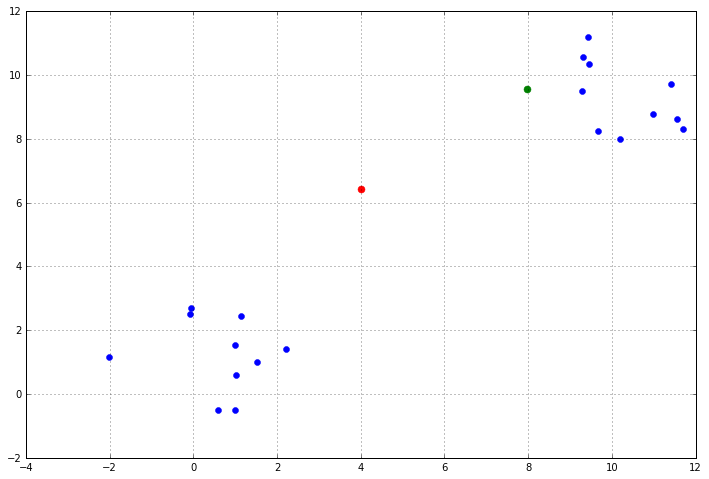

In [14]:
np.random.seed(1337)
cs = 10
x1 = np.random.multivariate_normal([10,10], [[1,0],[0,1]], cs)
x2 = np.random.multivariate_normal([1,1], [[1.2,0],[0,1.3]], cs)
x3 = np.random.multivariate_normal([5,5], [[1.2,0],[0,1.3]], 1)
x4 = np.random.multivariate_normal([9,9], [[1,0],[0,1]], 1)
X12 = np.concatenate((x1,x2), axis=0)
k = 5
X = np.concatenate((X12, x3, x4), axis=0)

f1 = plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
ax1 = f1.add_subplot(111)
ax1.plot(*zip(*X12), marker='.', color='b', markersize=12, ls='')
ax1.plot(*zip(*x3), marker='.', color='r', markersize=14, ls='')
ax1.plot(*zip(*x4), marker='.', color='g', markersize=14, ls='')
ax1.grid(True)

The red point is an obvious outlier. The green point is a little outside the cluster, but could very well be a realistic value.

We now will use the Local Outlier Factor (LOF) to determine which points are outliers.

In [15]:
#knn function gets the dataset and calculates K-Nearest neighbors and distances
def knn(df,k):
    nbrs = NearestNeighbors(n_neighbors=k)
    nbrs.fit(df)
    distances, indices = nbrs.kneighbors(df)
    return distances, indices

#reachDist calculates the reach distance of each point to MinPts around it
def reachDist(df,MinPts,knnDist):
    nbrs = NearestNeighbors(n_neighbors=MinPts)
    nbrs.fit(df)
    distancesMinPts, indicesMinPts = nbrs.kneighbors(df)
    distancesMinPts[:,0] = np.amax(distancesMinPts,axis=1)
    distancesMinPts[:,1] = np.amax(distancesMinPts,axis=1)
    distancesMinPts[:,2] = np.amax(distancesMinPts,axis=1)
    return distancesMinPts, indicesMinPts

#lrd calculates the Local Reachability Density
def lrd(MinPts,knnDistMinPts):
    return (MinPts/np.sum(knnDistMinPts,axis=1))

#Finally lof calculates lot outlier scores
def lof(Ird,MinPts,dsts):
    lof=[]
    for item in dsts:
       tempIrd = np.divide(Ird[item[1:]],Ird[item[0]])
       lof.append(tempIrd.sum()/MinPts)
    return lof

k = 5 #For can be changed
knndist, knnindices = knn(X,k)
reachdist, reachindices = reachDist(X,k,knndist)
irdMatrix = lrd(5,reachdist)
lofScores = np.array(lof(irdMatrix,5,reachindices))

Several sources define outliers as points with greater value than 1.2. In this example we get the following LOF scores.

In [16]:
lofScores

array([ 0.62303457,  1.09889528,  0.86221794,  0.70783373,  0.7750227 ,
        1.15154326,  1.06341975,  0.84339848,  0.74069839,  0.55644938,
        1.1521022 ,  1.18745603,  0.71142025,  1.63345421,  0.59916232,
        1.18772589,  1.12341734,  0.69900029,  0.93560007,  0.84027628,
        2.54039465,  1.08060449])

We see that the red point gets a LOF score of 2.54, way above the set limit. We also notice that one more point has a value greater than 1.2. This is the leftmost point, and has a LOF score of 1.63.

The basic idea of LOF is to compare the density of each point against its k-nearest neighbors.

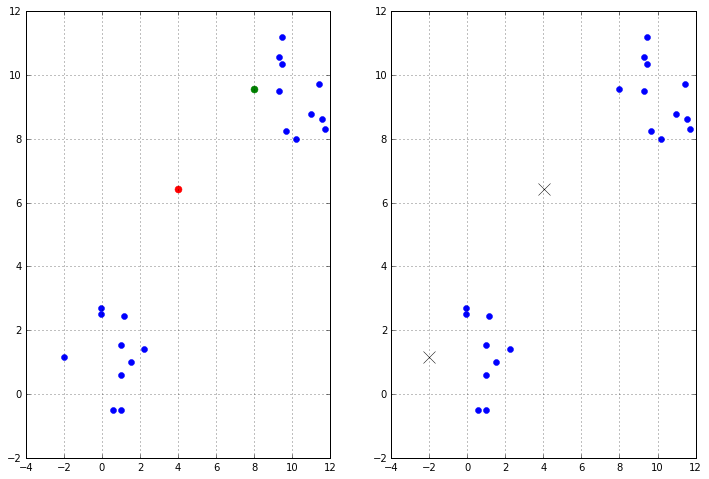

In [17]:
outmask = np.where(lofScores > 1.2)
inmask = np.where(lofScores <= 1.2)
inliers = [X[i] for i in inmask][0]
outliers = [X[i] for i in outmask][0]

f3 = plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
ax31 = f3.add_subplot(121)
ax31.plot(*zip(*X12), marker='.', color='b', markersize=12, ls='')
ax31.plot(*zip(*x3), marker='.', color='r', markersize=14, ls='')
ax31.plot(*zip(*x4), marker='.', color='g', markersize=14, ls='')
ax31.grid(True)

ax32 = f3.add_subplot(122)
ax32.plot(*zip(*inliers), marker='.', color='b', markersize=12, ls='')
ax32.plot(*zip(*outliers), marker='x', color='k', markersize=12, ls='')
ax32.grid(True)

f3.savefig('figures/lof_example.pdf',bbox_inches='tight')

Kilde: http://shahramabyari.com/2015/12/30/my-first-attempt-with-local-outlier-factorlof-identifying-density-based-local-outliers/

Kilde: http://www.dbs.ifi.lmu.de/Publikationen/Papers/LOF.pdf